In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import imutils
from matplotlib.colors import hsv_to_rgb
import cvutils
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

%matplotlib inline

Take HSV and BGR image and apply masks, output grayscale mask

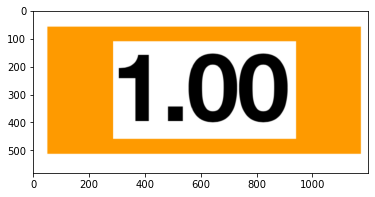

In [3]:
# open image (cv2 opens it in BGR)
img = cv2.imread('./assets/1m_ruler.jpg')
img = imutils.resize(img, width=1200)
plt.imshow(img)

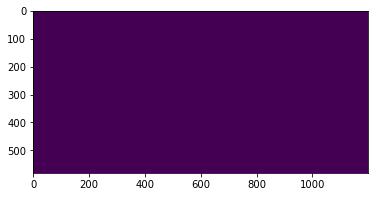

In [4]:

# convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# hsv mask values
min_hue, min_saturation, min_value = 135, 240, 240
max_hue, max_saturation, max_value = 150, 255, 255

#display the initial masks
mask = cv2.inRange(hsv, (min_hue, min_saturation, min_value), (max_hue, max_saturation, max_value))
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

plt.imshow(mask)

Find contours on the mask

In [5]:
gray = img

# treshhold the brighness
tresh = 100
ret, tresh_img = cv2.threshold(gray, tresh, 255, cv2.THRESH_BINARY)

# grab contours
contours, _ = cv2.findContours(tresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create an empty image for the contours
contours_img = np.zeros(gray.shape)

# draw the contours on the empty image
cv2.drawContours(image=contours_img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)

# plt.show(contours_img)
cv2.imshow('contours', contours_img)
cv2.waitKey(0)

error: OpenCV(4.5.3) /Users/runner/miniforge3/conda-bld/libopencv_1633800950233/work/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


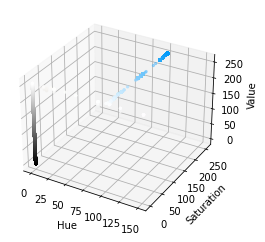

In [6]:
img = cv2.imread('./assets/1m_ruler.jpg')
img = imutils.resize(img, width=1200)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = rgb.reshape((np.shape(rgb)[0]*np.shape(rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

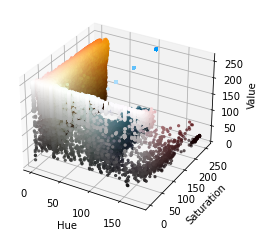

In [9]:
img = cv2.imread('./assets/coq_mix.jpg')
img = imutils.resize(img, width=1200)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = rgb.reshape((np.shape(rgb)[0]*np.shape(rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
# plt.savefig('3d_hsv_colorspace.jpg', dpi=600)
plt.show()

In [2]:
import pandas as pd

In [54]:
df = pd.DataFrame(columns=['A','B', 'C'])
np.array([[12]])
numbers = [np.array([[12]]), np.array([[13]]), np.array([[14]]), np.array([[15]])]

In [56]:
df = df.append([{'A': numbers[i], 'B':None, 'C':None} for i in range(len(numbers))], ignore_index=True)

In [61]:
df

,A,B,C
0,[[12]],None,None
1,[[13]],None,None
2,[[14]],None,None
3,[[15]],None,None


In [62]:
df.drop(0)

,A,B,C
1,[[13]],None,None
2,[[14]],None,None
3,[[15]],None,None


In [20]:
contours_df = pd.read_pickle('contours_df.pkl')
len(contours_df[contours_df['state']=='GOOD'])

3

In [11]:
row = contours_df[contours_df['state']=='GOOD'].iloc[0]
row['circle'][0]

(599, 666)

In [ ]:
for index, row in contours_df[contours_df['state']=='GOOD'].itterows()